<a href="https://colab.research.google.com/github/dzakimaulana/Laptop-Price-Prediction-RFR/blob/main/Random_Forest_Regression_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laptop Price Prediction**







In [ ]:
import pandas as pd
import numpy as np

## **Upload Dataset**

In [ ]:
from google.colab import files
# uploaded = files.upload()

## **Import Dataset**

In [246]:
data = pd.read_csv('Laptop_price.csv')
data

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


## **Data Assessing**

In [247]:
data.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [249]:
data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [250]:
data.shape

(1000, 7)

## **Data Transforming**

In [251]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = data.drop(columns=['Price'], axis=1)
y = data['Price']

def data_transform(X):
  categorical_features = ["Brand"]
  one_hot = OneHotEncoder()
  transformer = ColumnTransformer([("one_hot",
                                    one_hot,
                                    categorical_features)],
                                  remainder="passthrough")

  transformed_X = transformer.fit_transform(X)
  return transformed_X

transformed_X = data_transform(X)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,3.830296,16.0,512.0,11.185147,2.641094
1,1.0,0.0,0.0,0.0,0.0,2.912833,4.0,1000.0,11.311372,3.260012
2,0.0,0.0,0.0,0.0,1.0,3.241627,4.0,256.0,11.853023,2.029061
3,1.0,0.0,0.0,0.0,0.0,3.806248,16.0,512.0,12.280360,4.573865
4,1.0,0.0,0.0,0.0,0.0,3.268097,32.0,1000.0,14.990877,4.193472
...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,3.343584,4.0,1000.0,12.587095,3.162399
996,0.0,0.0,1.0,0.0,0.0,2.780555,8.0,256.0,12.679356,3.750265
997,0.0,0.0,1.0,0.0,0.0,3.200569,4.0,512.0,12.666315,3.392612
998,0.0,1.0,0.0,0.0,0.0,1.604182,8.0,256.0,11.215581,3.857613


In [252]:
pd.DataFrame(X)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
0,Asus,3.830296,16,512,11.185147,2.641094
1,Acer,2.912833,4,1000,11.311372,3.260012
2,Lenovo,3.241627,4,256,11.853023,2.029061
3,Acer,3.806248,16,512,12.280360,4.573865
4,Acer,3.268097,32,1000,14.990877,4.193472
...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399
996,Dell,2.780555,8,256,12.679356,3.750265
997,Dell,3.200569,4,512,12.666315,3.392612
998,Asus,1.604182,8,256,11.215581,3.857613


In [253]:
dummies = pd.get_dummies(data[["Brand", "RAM_Size", "Storage_Capacity"]])
dummies

,RAM_Size,Storage_Capacity,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,16,512,0,1,0,0,0
1,4,1000,1,0,0,0,0
2,4,256,0,0,0,0,1
3,16,512,1,0,0,0,0
4,32,1000,1,0,0,0,0
...,...,...,...,...,...,...,...
995,4,1000,0,0,0,1,0
996,8,256,0,0,1,0,0
997,4,512,0,0,1,0,0
998,8,256,0,1,0,0,0


## **Random Forest Regressor Modeling**

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.3, random_state=0)

rfr = RandomForestRegressor(n_estimators=1000, random_state=1)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.9994310717256853

## **Visualise**

In [263]:
# predict price with new 1000 storage value
X_proc = np.linspace(min(X_train[:, 7]), max(X_train[:, 7]), 1000)
X_new = X
X_new["Storage_Capacity"] = X_proc
ptrans_X = data_transform(X_new)
y_ppred = rfr.predict(ptrans_X)

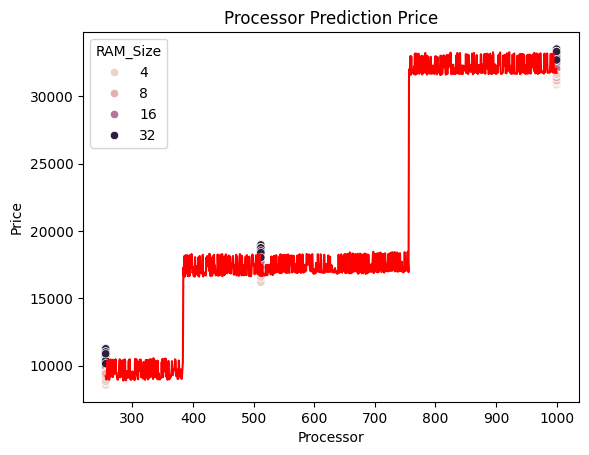

<Figure size 100x100 with 0 Axes>

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.scatterplot(x='Storage_Capacity', y='Price', data=data,
               hue='RAM_Size')
plt.plot(X_proc, y_ppred, color = 'red') # prediction

plt.title('Processor Prediction Price')
plt.xlabel('Processor')
plt.ylabel('Price')
plt.figure(figsize=(1, 1))

plt.show()

## **Price Prediction**

In [ ]:
# data.groupby('Brand')['Price'].unique()
brand_list = pd.DataFrame({'Brand': ['Acer', 'Asus', 'Dell', 'HP', 'Lenovo']})
brand_list

,Brand
0,Acer
1,Asus
2,Dell
3,HP
4,Lenovo


In [265]:
def price_pred(name, cpu_speed, ram, storage, screen_size, weight):
  try:
    # create new data
    X_new = [[name, cpu_speed, ram, storage, screen_size, weight]]
    new_data = pd.DataFrame(X_new, columns=["Brand", "Processor_Speed", "RAM_Size", "Storage_Capacity", "Screen_Size", "Weight"])

    # create float of string
    brand_index = brand_list.loc[brand_list['Brand'] == name].index[0]
    brand_transform = np.zeros((1, len(brand_list)))
    brand_transform[0, brand_index] = 1.0

    # transform string into float
    ntransformed_X = transformer.fit_transform(new_data)
    ntransformed_X = np.delete(ntransformed_X, 0, axis=1)
    ntransformed_X = np.concatenate((brand_transform, ntransformed_X), axis=1)

    price_pred = rfr.predict(ntransformed_X)
    return price_pred
  except IndexError:
    print("Brand not yet registered")
    return

In [266]:
# name, cpu, ram, storage, size, weight
laptop_price_pred = price_pred("Lenovo", 4, 8, 1000, 14.2, 1.5)
laptop_price_pred

array([31930.15091666])